**Data Exploration:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import networkx as nx
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/#SMA/exp data/facebook.csv')

In [ ]:
#1) View dimensions of dataset
df.shape

(53, 15)

In [ ]:
#2) review the dataset
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1098141.0,26.0,12.0,1987.0,2.0,male,89.0,8.0,NaN,2,7.0,0,2,2.0,5.0
2,1888105.0,43.0,16.0,1970.0,12.0,male,280.0,8.0,7.0,2,3.0,0,3,2.0,0.0
3,1335988.0,65.0,26.0,1948.0,5.0,male,66.0,8.0,4.0,2,3.0,0,2,2.0,1.0
4,1889953.0,69.0,5.0,1944.0,7.0,male,1021.0,8.0,4.0,2,68.0,0,28,2.0,40.0


In [ ]:
#3) View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 52 non-null     float64
 1   age                    52 non-null     float64
 2   dob_day                52 non-null     float64
 3   dob_year               52 non-null     float64
 4   dob_month              52 non-null     float64
 5   gender                 52 non-null     object 
 6   tenure                 52 non-null     float64
 7   friend_count           52 non-null     float64
 8   friendships_initiated  50 non-null     float64
 9   likes                  52 non-null     object 
 10  likes_received         50 non-null     float64
 11  mobile_likes           52 non-null     object 
 12  mobile_likes_received  52 non-null     object 
 13  www_likes              52 non-null     float64
 14  www_likes_received     52 non-null     float64
dtypes: float

In [ ]:
#4) Check for missing values
df.isnull().sum()

userid                   1
age                      1
dob_day                  1
dob_year                 1
dob_month                1
gender                   1
tenure                   1
friend_count             1
friendships_initiated    3
likes                    1
likes_received           3
mobile_likes             1
mobile_likes_received    1
www_likes                1
www_likes_received       1
dtype: int64

In [ ]:
#5) Descriptive statistics with describe() function
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,www_likes,www_likes_received
count,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,50.000000,50.000000,52.000000,52.000000
mean,1.590496e+06,38.557692,13.807692,1974.442308,6.096154,424.269231,8.0,5.020000,3.560000,0.903846,1.711538
std,3.252860e+05,21.066108,9.111592,21.066108,3.625939,493.356337,0.0,2.199165,9.841934,1.124759,5.855571
min,1.043991e+06,13.000000,1.000000,1905.000000,1.000000,1.000000,8.0,0.000000,0.000000,0.000000,0.000000
25%,1.332531e+06,22.000000,5.750000,1958.000000,2.750000,46.000000,8.0,4.000000,0.000000,0.000000,0.000000
50%,1.596930e+06,32.000000,14.000000,1981.000000,7.000000,283.500000,8.0,5.000000,1.000000,0.000000,0.000000
75%,1.768256e+06,55.000000,20.000000,1991.000000,8.000000,502.750000,8.0,7.000000,2.750000,2.000000,1.000000
max,2.169730e+06,108.000000,31.000000,2000.000000,12.000000,1679.000000,8.0,8.000000,68.000000,3.000000,40.000000


In [ ]:
#6) Summary statistics of character columns
df.describe(include=['object'])

,gender,likes,mobile_likes,mobile_likes_received
count,52,52,52,52
unique,2,3,5,9
top,male,2,2,0
freq,42,37,23,25


In [ ]:
#7) Summary statistics of all the columns
df.describe(include='all')

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52,52.000000,52.0,50.000000,52,50.000000,52,52,52.000000,52.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,3,NaN,5,9,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,2,NaN,2,0,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,42,NaN,NaN,NaN,37,NaN,23,25,NaN,NaN
mean,1.590496e+06,38.557692,13.807692,1974.442308,6.096154,NaN,424.269231,8.0,5.020000,NaN,3.560000,NaN,NaN,0.903846,1.711538
std,3.252860e+05,21.066108,9.111592,21.066108,3.625939,NaN,493.356337,0.0,2.199165,NaN,9.841934,NaN,NaN,1.124759,5.855571
min,1.043991e+06,13.000000,1.000000,1905.000000,1.000000,NaN,1.000000,8.0,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000
25%,1.332531e+06,22.000000,5.750000,1958.000000,2.750000,NaN,46.000000,8.0,4.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000
50%,1.596930e+06,32.000000,14.000000,1981.000000,7.000000,NaN,283.500000,8.0,5.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000
75%,1.768256e+06,55.000000,20.000000,1991.000000,8.000000,NaN,502.750000,8.0,7.000000,NaN,2.750000,NaN,NaN,2.000000,1.000000


Data vizualization:

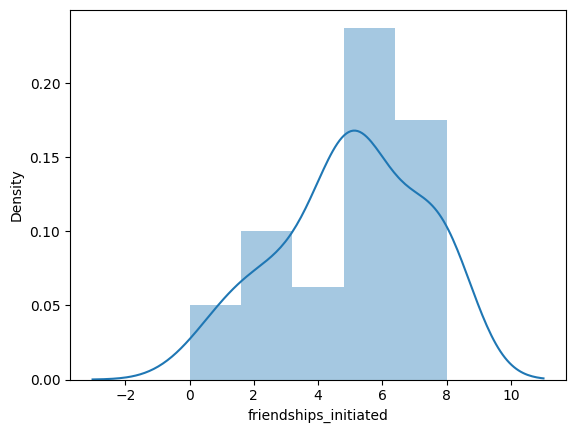

In [ ]:
#1) histogram
import seaborn as sns
sns.distplot(df['friendships_initiated']);

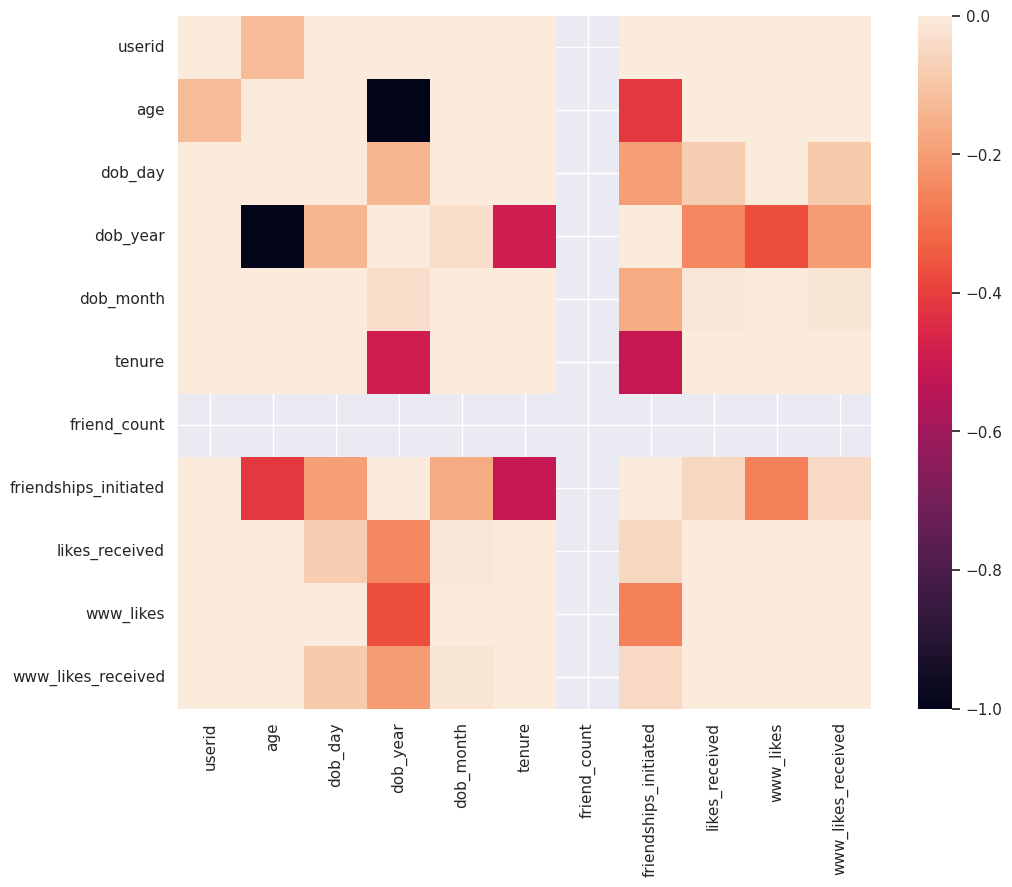

In [ ]:
#2) correlation matrix
import seaborn as sns
corrmat = df.corr()
f, ax =plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax = 0, square=True)
plt.show()

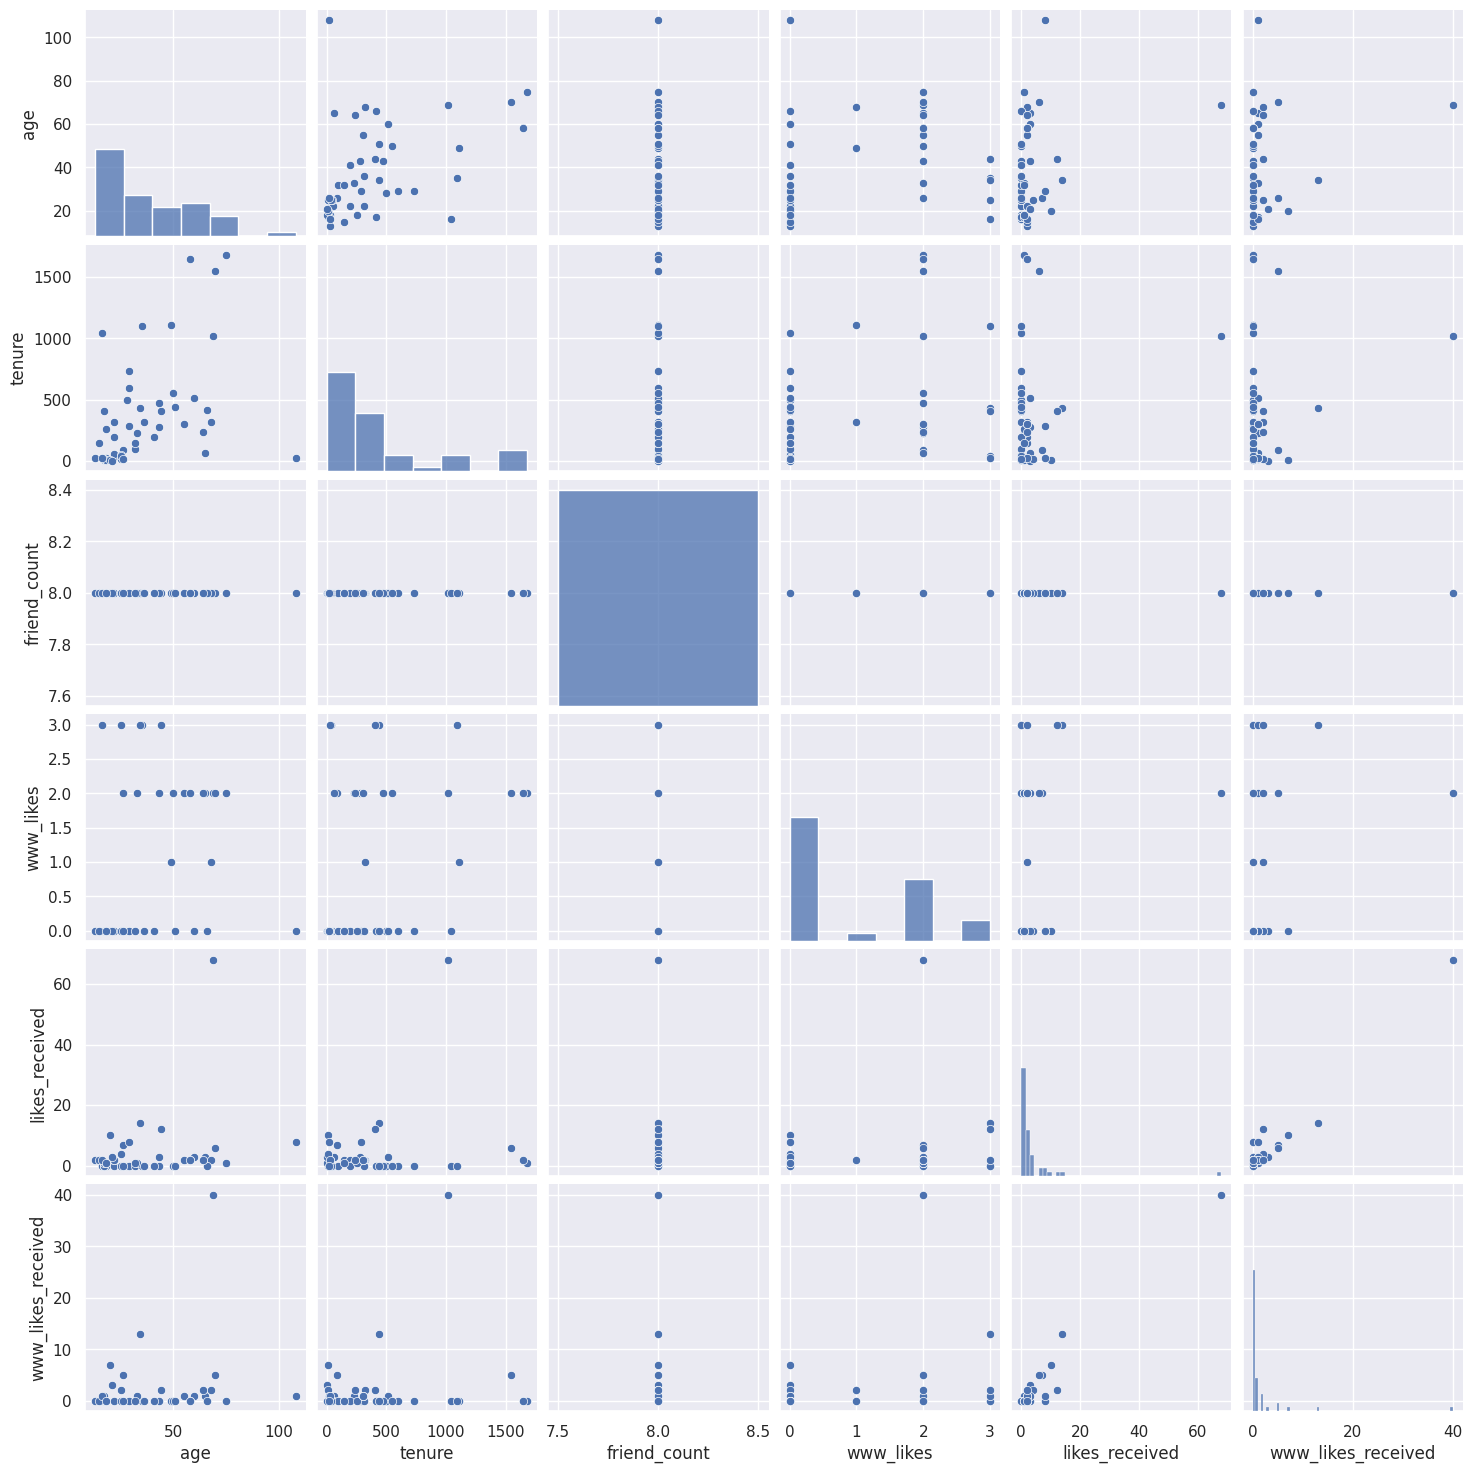

In [ ]:
#3) Scatterplot for any 6 variables
sns.set()
cols = ['age', 'tenure', 'friend_count', 'www_likes', 'likes_received', 'www_likes_received']
sns.pairplot(df[cols], size = 2.5)
plt.show();

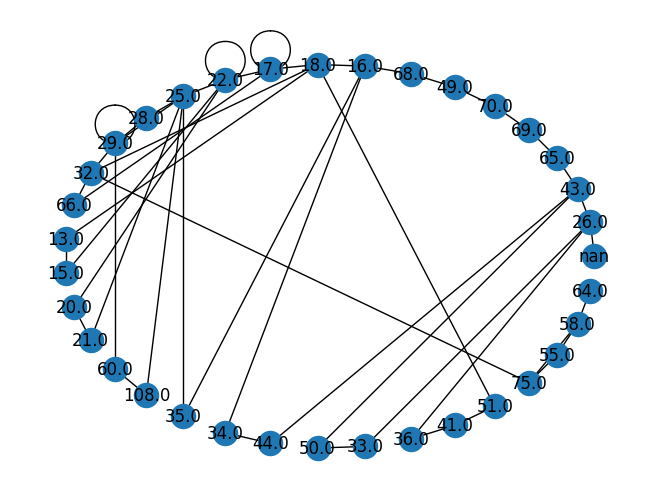

In [ ]:
#4) Draw the graph G with a circular layout.
G = nx.path_graph(df['age'])
nx.draw_circular(G, with_labels = True)
#nx.draw(G, pos=pos)

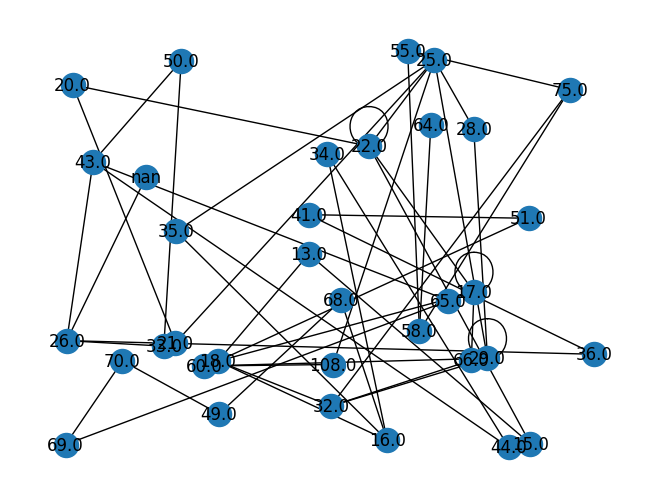

In [ ]:
#5) Draw the graph G with a random layout
G = nx.path_graph(df['age'])
nx.draw_random(G, with_labels = True)


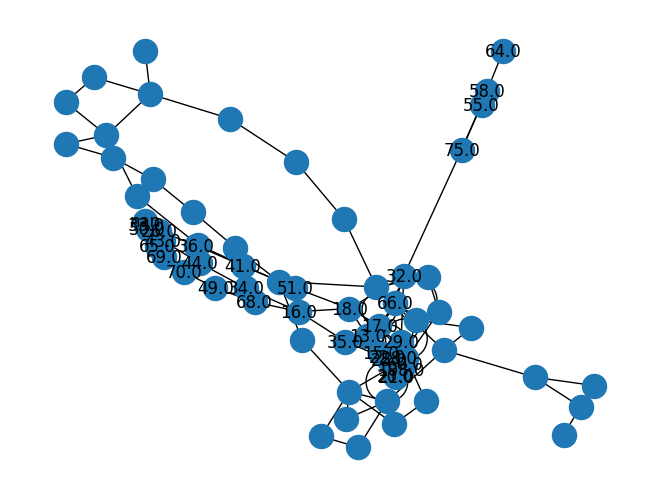

In [ ]:
#6) Draw the graph G with a spectral 2D layout
G = nx.path_graph(df['age'])
pos = nx.draw_spectral(G, with_labels = True)
nx.draw(G,pos = pos)


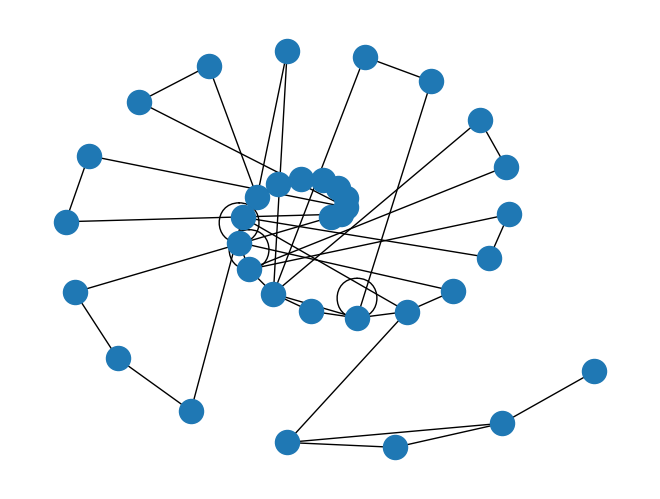

In [ ]:
#7)Draw the graph G with a spiral layout
G = nx.path_graph(df['age'])
pos = nx.spiral_layout(G)
nx.draw(G, pos=pos)


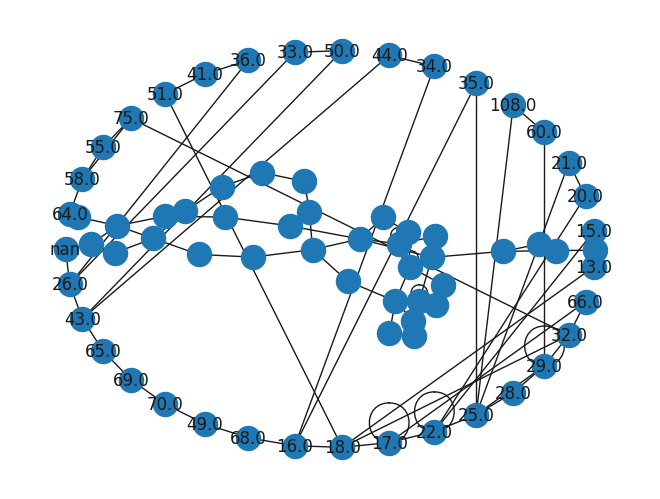

In [ ]:
#8) Draw the graph G with a shell layout.
G = nx.path_graph(df['age'])
pos = nx.draw_shell(G, with_labels = True)
nx.draw(G, pos=pos)